# Load Digits Data

In [68]:
from sklearn.datasets import load_digits

digits = load_digits()

In [69]:
digits['target']

array([0, 1, 2, ..., 8, 9, 8])

In [70]:
digits['data']

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [71]:
digits['data'].min(), digits['data'].max()

(0.0, 16.0)

In [72]:
digits['data'].shape

(1797, 64)

In [73]:
digits['target'].shape

(1797,)

## Displaying Digits

In [74]:
def display_img(img, target, ax, vmin=0, vmax=16):
    img = img.reshape((8, 8))
    
    ax.imshow(img, cmap='gray', vmin=vmin, vmax=vmax)
    ax.set_title(f'Digit: {str(target)}')
    ax.grid(False)

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


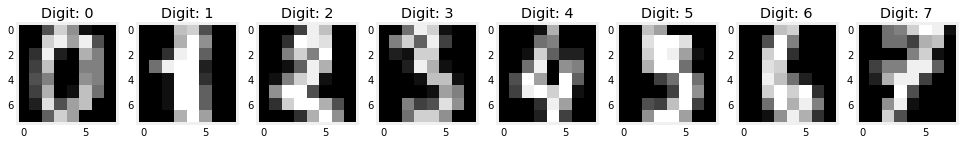

In [75]:
fig, axs = plt.subplots(1, 8, figsize=(15, 10))

for i in range(8):
    display_img(digits['data'][i], digits['target'][i], axs[i])

fig.show()

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


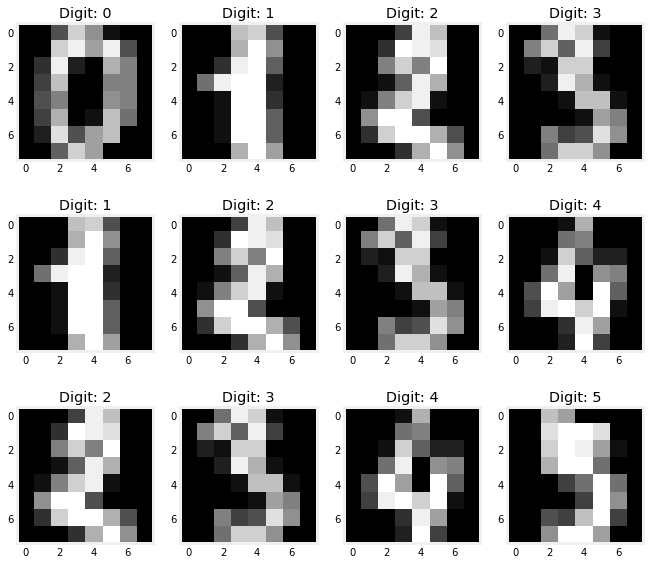

In [76]:
fig, axs = plt.subplots(3, 4, figsize=(10, 10))

for i in range(3):
    for j in range(4):
        display_img(digits['data'][i+j], digits['target'][i+j], axs[i][j])

fig.show()

## Digits Train/Test Split

In [77]:
from sklearn.model_selection import train_test_split

x, y = digits['data'], digits['target']

x_train, x_test, y_train, y_test = train_test_split(x, y)

In [78]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1347, 64), (450, 64), (1347,), (450,))

In [79]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()
clf = LogisticRegression()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

clf.fit(x_train_scaled, y_train)

y_train_pred = clf.predict(x_train_scaled)
y_test_pred = clf.predict(x_test_scaled)


from sklearn.metrics import accuracy_score

from sklearn.metrics import accuracy_score

print(
    'Digits test accuracy score: {:.1%} [train score: {:.1%}]'.format(
        accuracy_score(y_test, y_test_pred),
        accuracy_score(y_train, y_train_pred)
    )
    
)

Digits test accuracy score: 96.9% [train score: 99.9%]


## Digits KNN

In [374]:
import time

def apply_and_time(fn, *args):
    t1 = time.time()
    fn_return = fn(*args)
    t2 = time.time()
    print(f'Time taken to fit {t2 - t1:.2f}s')
    return fn_return

In [375]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3, metric='euclidean')

apply_and_time(clf.fit, x_train, y_train)

y_test_pred = apply_and_time(clf.predict, x_test)

Time taken to fit 0.03s
Time taken to fit 0.12s


In [376]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=11, metric='manhattan')

clf.fit(x_train, y_train)

y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

In [377]:
from sklearn.metrics import accuracy_score

print(
    'Digits test accuracy score: {:.1%} [train score: {:.1%}]'.format(
        accuracy_score(y_test, y_test_pred),
        accuracy_score(y_train, y_train_pred)
    )
    
)

Digits test accuracy score: 96.9% [train score: 98.5%]


/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


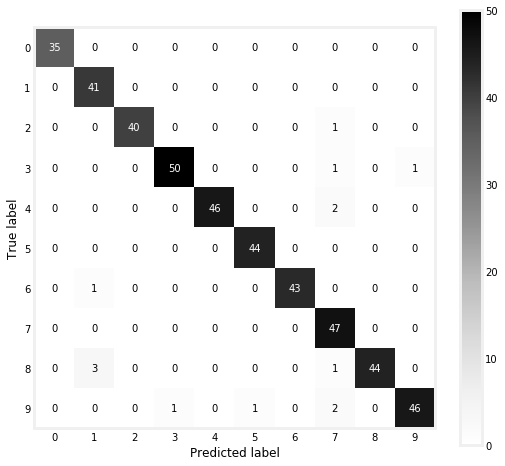

In [378]:
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(1, 1, figsize=(8, 8))

plot_confusion_matrix(clf, x_test, y_test, cmap='Greys', ax=ax)
ax.grid(False)
ax.set_label('MNIST Confusion Matrix')

fig.show()

## K 

In [379]:
x_train.shape[0]

1347

In [380]:
from sklearn.preprocessing import Binarizer
from sklearn.neighbors import KNeighborsClassifier

scaler = Binarizer()

x_train_high_contrast = scaler.fit_transform(x_train)
x_test_high_contrast = scaler.transform(x_test)

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


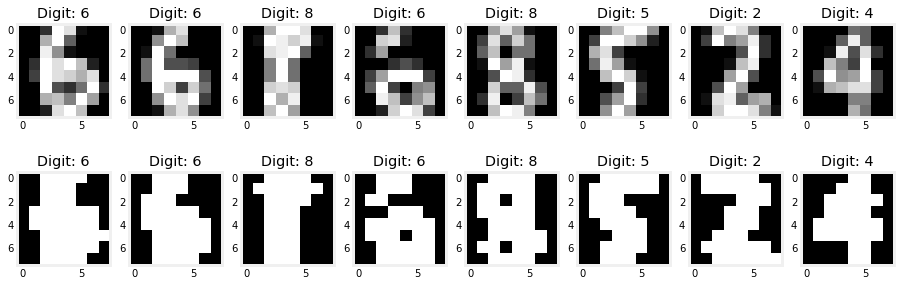

In [381]:
import random 

fig, axs = plt.subplots(2, 8, figsize=(14, 5))

for i in range(8):
    
    rand = random.choice(range(y_train.shape[0]))

    img_orig = x_train[rand]
    img_comp = x_train_high_contrast[rand]
    
    display_img(img_orig, y_train[rand], axs[0][i], vmin=None, vmax=None)
    display_img(img_comp, y_train[rand], axs[1][i], vmin=None, vmax=None)


fig.show()

In [407]:
scores = {}

for k in range(1, 1301, 25):
    
    clf = KNeighborsClassifier(n_neighbors=k, metric='cosine', p=3)
    clf.fit(x_train_high_contrast, y_train)
    y_test_pred = clf.predict(x_test_high_contrast)
    scores[k] = accuracy_score(y_test, y_test_pred)

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


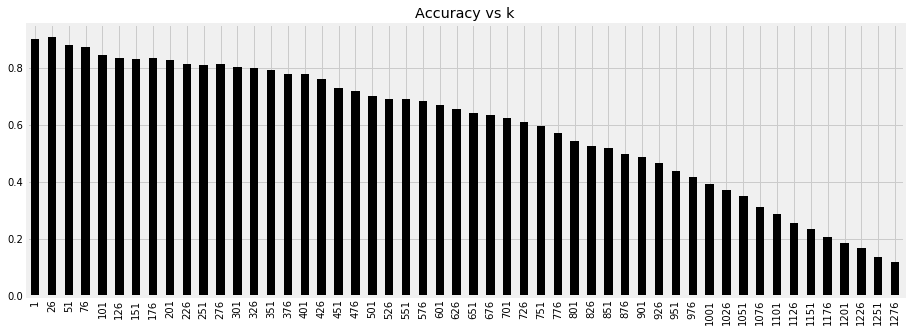

In [408]:
fig, ax = plt.subplots(1, 1, figsize=(14, 5))

pd.Series(scores).plot(
    title='Accuracy vs k',
    kind='bar',
    color='k',
    ax=ax
)

fig.show()

In [413]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

parameters = {'metric':('manhattan','euclidean', 'cosine'), 'n_neighbors': range(1, 21)}

knn = KNeighborsClassifier()
clf = GridSearchCV(knn, param_grid=parameters, scoring='accuracy', cv=5)

clf.fit(x_train, y_train)

print('best_params:', clf.best_params_)
print('best_score:', clf.best_score_)

best_params: {'metric': 'euclidean', 'n_neighbors': 3}
best_score: 0.9866308687870026


In [412]:
y_test_pred = clf.predict(x_test)
accuracy_score(y_test, y_test_pred)

0.98

In [192]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Binarizer
from sklearn.neighbors import KNeighborsClassifier

scaler = Binarizer()
clf = KNeighborsClassifier(n_neighbors=3, metric='euclidean')

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

clf.fit(x_train_scaled, y_train)

y_train_pred = clf.predict(x_train_scaled)
y_test_pred = clf.predict(x_test_scaled)

from sklearn.metrics import accuracy_score

print(
    'Digits test accuracy score: {:.1%} [train score: {:.1%}]'.format(
        accuracy_score(y_test, y_test_pred),
        accuracy_score(y_train, y_train_pred)
    )
    
)


Digits test accuracy score: 86.2% [train score: 95.1%]


/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


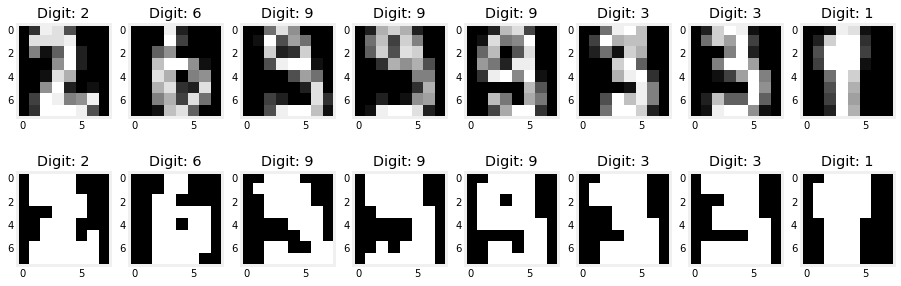

In [16]:
import random 

fig, axs = plt.subplots(2, 8, figsize=(14, 5))

for i in range(8):
    
    rand = random.choice(range(y_train.shape[0]))

    img_orig = x_train[rand]
    img_comp = x_train_scaled[rand]
    
    display_img(img_orig, y_train[rand], axs[0][i], vmin=None, vmax=None)
    display_img(img_comp, y_train[rand], axs[1][i], vmin=None, vmax=None)


fig.show()

In [17]:
from scipy import ndimage

k_sharpen = [[0,-1,0], [-1,5,-1], [0,-1,0]]
k_smooth = [[0.1,0.1,0.1],[0.1,0.2,0.1],[0.1,0.1,0.1]]
k_wtf = [[1,-1],[-1,0]]
k = k_wtf

x_train_conv = ndimage.convolve(x_train.reshape((x_train.shape[0], 8, 8)), [k], mode='reflect', cval=0.0) 
x_test_conv = ndimage.convolve(x_test.reshape((x_test.shape[0], 8, 8)), [k], mode='reflect', cval=0.0)

x_train_conv = x_train_conv.reshape(x_train_conv.shape[0], x_train_conv.shape[1]*x_train_conv.shape[2]) 
x_test_conv = x_test_conv.reshape(x_test_conv.shape[0], x_test_conv.shape[1]*x_test_conv.shape[2]) 

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


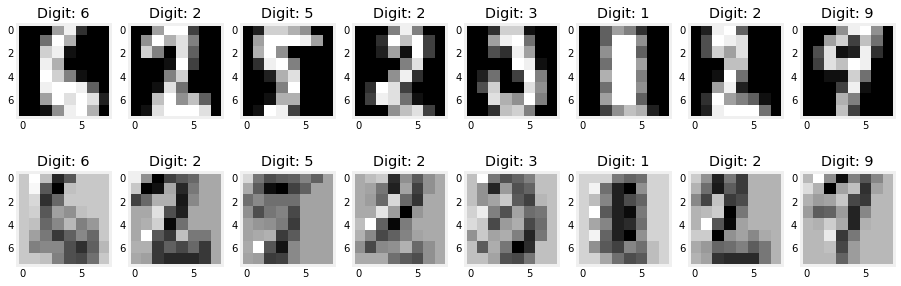

In [18]:
import random 

fig, axs = plt.subplots(2, 8, figsize=(14, 5))

for i in range(8):
    
    rand = random.choice(range(y_train.shape[0]))

    img_orig = x_train[rand]
    img_conv = x_train_conv[rand]
    
    display_img(img_orig, y_train[rand], axs[0][i], vmin=None, vmax=None)
    display_img(img_conv, y_train[rand], axs[1][i], vmin=None, vmax=None)


fig.show()

In [19]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3, metric='euclidean')

clf.fit(x_train_conv, y_train)
y_train_pred = clf.predict(x_train_conv)
y_test_pred = clf.predict(x_test_conv)


from sklearn.metrics import accuracy_score

print(
    'Digits test accuracy score: {:.1%} [train score: {:.1%}]'.format(
        accuracy_score(y_test, y_test_pred),
        accuracy_score(y_train, y_train_pred)
    )
    
)


Digits test accuracy score: 98.4% [train score: 99.0%]


In [20]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3, metric='euclidean')

clf.fit(x_train, y_train)
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)


from sklearn.metrics import accuracy_score

print(
    'Digits test accuracy score: {:.1%} [train score: {:.1%}]'.format(
        accuracy_score(y_test, y_test_pred),
        accuracy_score(y_train, y_train_pred)
    )
    
)


Digits test accuracy score: 98.7% [train score: 99.4%]


## Inverted Image

In [425]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3, metric='euclidean')

clf.fit(x_train, y_train)
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)


print(
    'Digits test accuracy score: {:.1%} [train score: {:.1%}]'.format(
        accuracy_score(y_test, y_test_pred),
        accuracy_score(y_train, y_train_pred)
    )
    
)


Digits test accuracy score: 98.0% [train score: 99.3%]


In [432]:
x_train_inv = x_train.max() - x_train

In [446]:
x_test_inv = x_test.max() - x_test

In [433]:
x_train_inv

array([[16., 16., 16., ...,  5., 16., 16.],
       [16., 16., 15., ..., 10., 16., 16.],
       [16., 16., 16., ..., 16., 16., 16.],
       ...,
       [16., 16., 16., ...,  2., 16., 16.],
       [16., 16.,  8., ..., 16., 16., 16.],
       [16., 16.,  7., ...,  1., 10., 16.]])

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:33: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


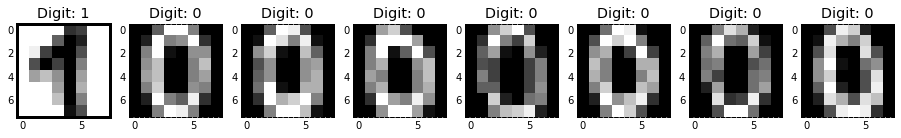

In [442]:
fig, axs = plt.subplots(1, 8, figsize=(14, 5))

display_img(img_inv, y_train[0], axs[0], vmin=None, vmax=None)
    
_, kneighbors_index_inv = clf.kneighbors(
    [x_train_inv[0]], 
    n_neighbors=7, 
    return_distance=True
)


for i, neighbor_index in enumerate(kneighbors_index_inv[0], 1):
    
    display_img(
        x_train[neighbor_index], 
        y_train[neighbor_index], 
        axs[i]
    )
    
# Styling


for i in range(n_neighbors+1):
    
    for spline in axs[i].spines.values():
        linestyle = '-' if i == 0 else '--'
        linewidth = 3 if i == 0 else 1
        
        spline.set_linestyle(linestyle)
        spline.set_linewidth(linewidth)
        spline.set_color('k')

fig.show()

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:70: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


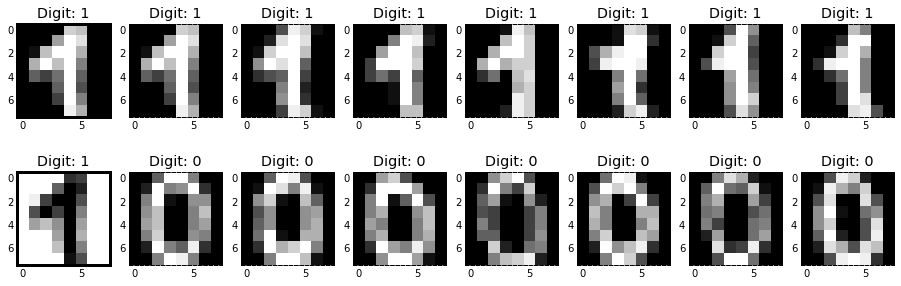

In [441]:
import random 

fig, axs = plt.subplots(2, 8, figsize=(14, 5))

rand = 0 # random.choice(range(y_train.shape[0]))

img_orig = x_train[rand]
img_inv = x_train_inv[rand]

display_img(img_orig, y_train[rand], axs[0][0], vmin=None, vmax=None)
display_img(img_inv, y_train[rand], axs[1][0], vmin=None, vmax=None)

n_neighbors = 7

_, kneighbors_index_orig = clf.kneighbors(
    [x_train[rand]], 
    n_neighbors=n_neighbors, 
    return_distance=True
)


for i, neighbor_index in enumerate(kneighbors_index_orig[0], 1):

    display_img(
        x_train[neighbor_index], 
        y_train[neighbor_index], 
        axs[0][i]
    )
    
    
_, kneighbors_index_inv = clf.kneighbors(
    [x_train_inv[rand]], 
    n_neighbors=n_neighbors, 
    return_distance=True
)


for i, neighbor_index in enumerate(kneighbors_index_inv[0], 1):
    
    display_img(
        x_train[neighbor_index], 
        y_train[neighbor_index], 
        axs[1][i]
    )
    
# Styling


for i in range(n_neighbors+1):
    
    for spline in axs[0][i].spines.values():
        linestyle = '-' if i == 0 else '--'
        linewidth = 3 if i == 0 else 1
        
        spline.set_linestyle(linestyle)
        spline.set_linewidth(linewidth)
        spline.set_color('k')
        
    for spline in axs[1][i].spines.values():
        linestyle = '-' if i == 0 else '--'
        linewidth = 3 if i == 0 else 1
        
        spline.set_linestyle(linestyle)
        spline.set_linewidth(linewidth)
        spline.set_color('k')
    
    


fig.show()

## Custom Distance

In [452]:
from sklearn.metrics.pairwise import euclidean_distances

def contrast_distance(x1, x2):
    _x1, _x2 = np.abs(8 - x1), np.abs(8 - x2)
    d = euclidean_distances([_x1], [_x2])
    return d[0][0]

contrast_distance(x_train[0], x_train[1])

24.61706725018234

In [453]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3, metric=contrast_distance)

clf.fit(x_train, y_train)

y_test_pred = clf.predict(x_test)
y_test_inv_pred = clf.predict(x_test_inv)


print(
    'Digits test accuracy score: {:.1%} [invertd test score: {:.1%}]'.format(
        accuracy_score(y_test, y_test_pred),
        accuracy_score(y_test, y_test_inv_pred)
    )
    
)


Digits test accuracy score: 89.3% [invertd test score: 89.3%]


/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:70: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


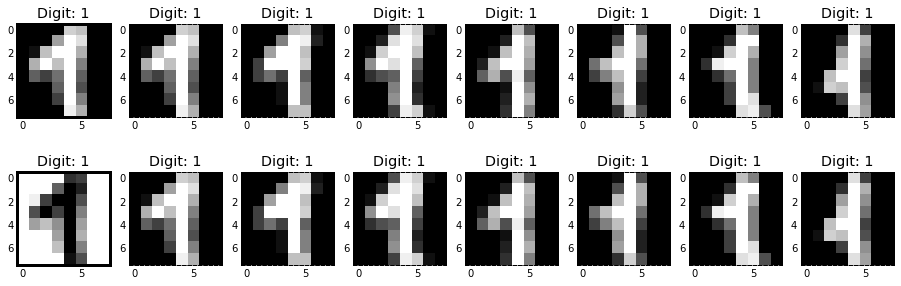

In [454]:
import random 

fig, axs = plt.subplots(2, 8, figsize=(14, 5))

rand = 0 # random.choice(range(y_train.shape[0]))

img_orig = x_train[rand]
img_inv = x_train_inv[rand]

display_img(img_orig, y_train[rand], axs[0][0], vmin=None, vmax=None)
display_img(img_inv, y_train[rand], axs[1][0], vmin=None, vmax=None)

n_neighbors = 7

_, kneighbors_index_orig = clf.kneighbors(
    [x_train[rand]], 
    n_neighbors=n_neighbors, 
    return_distance=True
)


for i, neighbor_index in enumerate(kneighbors_index_orig[0], 1):

    display_img(
        x_train[neighbor_index], 
        y_train[neighbor_index], 
        axs[0][i]
    )
    
    
_, kneighbors_index_inv = clf.kneighbors(
    [x_train_inv[rand]], 
    n_neighbors=n_neighbors, 
    return_distance=True
)


for i, neighbor_index in enumerate(kneighbors_index_inv[0], 1):
    
    display_img(
        x_train[neighbor_index], 
        y_train[neighbor_index], 
        axs[1][i]
    )
    
# Styling


for i in range(n_neighbors+1):
    
    for spline in axs[0][i].spines.values():
        linestyle = '-' if i == 0 else '--'
        linewidth = 3 if i == 0 else 1
        
        spline.set_linestyle(linestyle)
        spline.set_linewidth(linewidth)
        spline.set_color('k')
        
    for spline in axs[1][i].spines.values():
        linestyle = '-' if i == 0 else '--'
        linewidth = 3 if i == 0 else 1
        
        spline.set_linestyle(linestyle)
        spline.set_linewidth(linewidth)
        spline.set_color('k')
    
    


fig.show()

# KNN Regressor

In [455]:
from sklearn.model_selection import train_test_split

x, y = digits['data'], digits['target']

x_train, x_test, y_train, y_test = train_test_split(x, y)

In [456]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3, metric='euclidean')

clf.fit(x_train, y_train)
y_test_pred = clf.predict(x_test)

print(
    'MNIST: Accuracy score = {:.1%} & MAE = {:.2}'.format(
        accuracy_score(y_test, y_test_pred),
        mean_squared_error(y_test, y_test_pred)
    )
    
)

MNIST: Accuracy score = 99.6% & MAE = 0.089


In [533]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

reg = KNeighborsRegressor(n_neighbors=3, metric='euclidean')

reg.fit(x_train, y_train)
y_test_pred = reg.predict(x_test)
y_test_pred_int = y_test_pred.round(0).astype(int)

print(
    'MNIST: Accuracy score = {:.1%} & MAE = {:.2}'.format(
        accuracy_score(y_test, y_test_pred_int),
        mean_squared_error(y_test, y_test_pred)
    )
    
)


MNIST: Accuracy score = 97.8% & MAE = 0.13


In [534]:
df_mnist_rgrsr_pred = pd.DataFrame(
    {
        'y_test': y_test,
        'y_test_pred': y_test_pred,
    }
)

In [535]:
df_mnist_rgrsr_pred[
    (
        np.abs(df_mnist_rgrsr_pred['y_test'] - df_mnist_rgrsr_pred['y_test_pred']) > 0
    ) & (
        np.abs(df_mnist_rgrsr_pred['y_test'] - df_mnist_rgrsr_pred['y_test_pred']) < 1
    )
]

,y_test,y_test_pred
117,3,3.666667
215,8,8.333333
304,7,7.666667


In [549]:
df_mnist_rgrsr_pred_mistakes_idx = df_mnist_rgrsr_pred[
    (
        np.abs(df_mnist_rgrsr_pred['y_test'] - df_mnist_rgrsr_pred['y_test_pred']) > 0
    ) & (
        np.abs(df_mnist_rgrsr_pred['y_test'] - df_mnist_rgrsr_pred['y_test_pred']) < 1
    )
].index.tolist()

for i in df_mnist_rgrsr_pred_mistakes_idx:
    neighbors = reg.kneighbors(
        [x_test[i]], 
        n_neighbors=3, 
        return_distance=False
    )[0].tolist()
    
    print(y_test[i], y_test_pred[i])
    print(y_train[neighbors], np.mean(y_train[neighbors]))

3 3.6666666666666665
[3 3 5] 3.6666666666666665
8 8.333333333333334
[8 9 8] 8.333333333333334
7 7.666666666666667
[7 9 7] 7.666666666666667


[1135, 302, 551]

In [526]:
# import string

# df_mnist_rgrsr_pred = df_mnist_rgrsr_pred.groupby('y_test').tail(10) 

# df_mnist_rgrsr_pred[' '] = df_mnist_rgrsr_pred.groupby('y_test')[' '].transform('cumsum')
# df_mnist_rgrsr_pred[' '] = df_mnist_rgrsr_pred[' '].apply(lambda x: string.ascii_lowercase[x-1])

# def boldoze(s):
#     s_ret = []
#     for i, item in enumerate(s.values):
#         if item != i:
#             s_ret.append('background-color: black; color: white')
#         else:
#             s_ret.append('background-color: white; color: black')
#     return s_ret

# df_mnist_rgrsr_pred.pivot(' ', 'y_test', 'y_test_pred').round(3).style.apply(boldoze, axis=1)

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


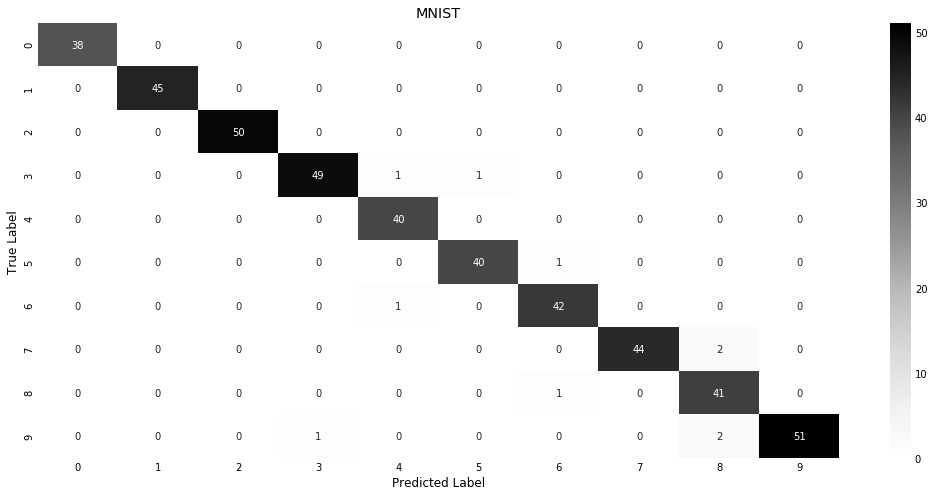

In [459]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

fig, ax = plt.subplots(1, 1, figsize=(16, 8))

cm = confusion_matrix(y_test, y_test_pred_int)
sns.heatmap(
    cm, cmap='Greys', 
    annot=True, 
    fmt="d",
    ax=ax
) 

ax.set_title('MNIST')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')

fig.show()

## H Compress

In [116]:
x_train.shape[0]

1347

In [149]:
x_train_hcompress = x_train.reshape((x_train.shape[0], 8,8)).mean(axis=1)
x_test_hcompress = x_test.reshape((x_test.shape[0], 8,8)).mean(axis=1)

In [152]:
x_train_vcompress = x_train.reshape((x_train.shape[0], 8,8)).transpose((0,2,1)).mean(axis=1)
x_test_vcompress = x_test.reshape((x_test.shape[0], 8,8)).transpose((0,2,1)).mean(axis=1) 

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


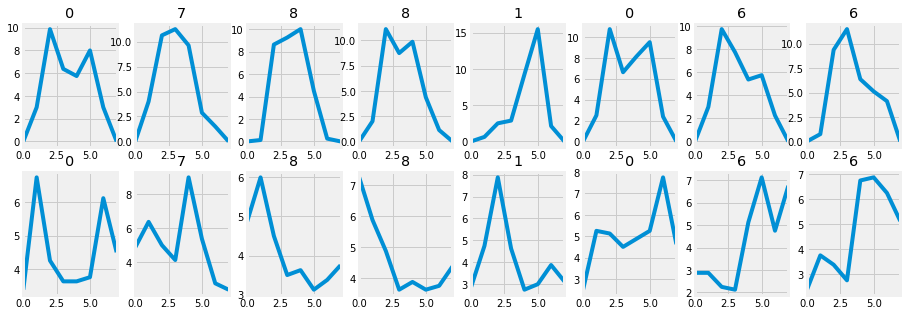

In [153]:
import random 

fig, axs = plt.subplots(2, 8, figsize=(14, 5))

for i in range(8):
    
    rand = random.choice(range(y_train.shape[0]))
    label = y_train[rand]

    pd.Series(x_train_hcompress[rand]).plot(
        title=str(label), kind='line', ax=axs[0][i]
    )
    
    pd.Series(x_train_vcompress[rand]).plot(
        title=str(label), kind='line', ax=axs[1][i]
    )


fig.show()

In [132]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsRegressor

clf = KNeighborsClassifier(n_neighbors=5, metric='cosine')

clf.fit(x_train_hcompress, y_train)
y_test_pred = clf.predict(x_test_hcompress)

print(
    'MNIST: Accuracy score = {:.1%} [H Compress]'.format(
        accuracy_score(y_test, y_test_pred),
    )
    
)

MNIST: Accuracy score = 62.4% [H Compress]


In [154]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsRegressor

clf = KNeighborsClassifier(n_neighbors=5, metric='cosine')

clf.fit(x_train_vcompress, y_train)
y_test_pred = clf.predict(x_test_vcompress)

print(
    'MNIST: Accuracy score = {:.1%} [V Compress]'.format(
        accuracy_score(y_test, y_test_pred),
    )
    
)

MNIST: Accuracy score = 83.6% [V Compress]


/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


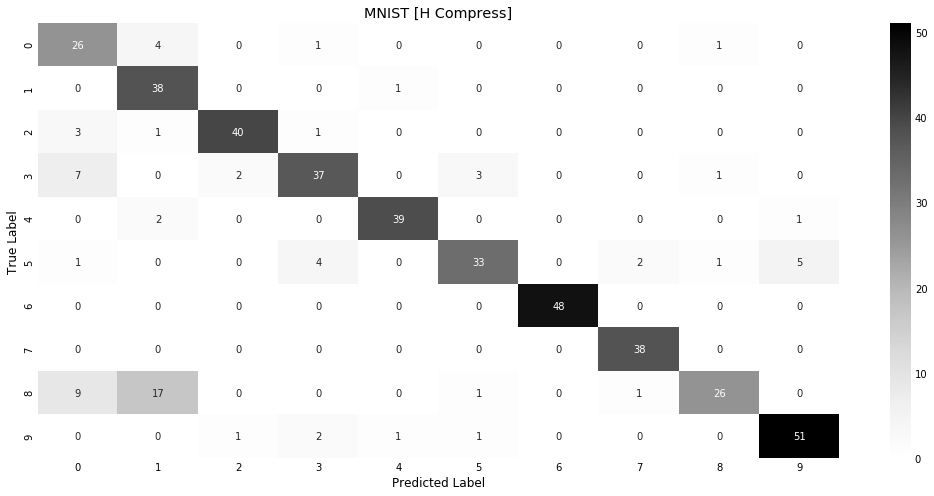

In [155]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

fig, ax = plt.subplots(1, 1, figsize=(16, 8))

cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(
    cm, cmap='Greys', 
    annot=True, 
    fmt="d",
    ax=ax
) 

ax.set_title('MNIST [H Compress]')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')

fig.show()

## Digits PCA

In [625]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
pca = PCA(n_components=2)

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

x_train_2d = pca.fit_transform(x_train_scaled)
x_test_2d = pca.transform(x_test_scaled)

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


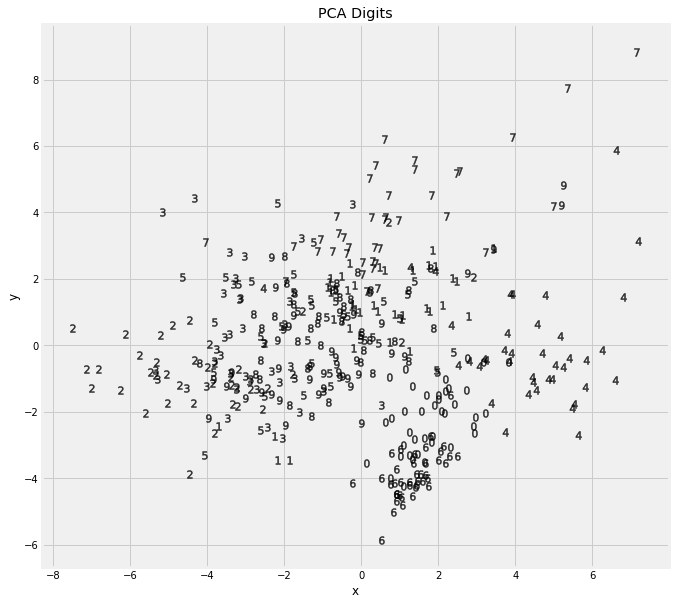

In [626]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

for target in set(y_train):
    pd.DataFrame(
        x_train_2d[
            y_train == target
        ],
        columns=['x', 'y']
    ).sample(n=40).plot(
        kind='scatter',
        x='x',
        y='y',
        marker=f'${target}$',
        s=64,
        color='k',
        alpha='0.75',
        ax=ax,
    )
    
ax.set_title('PCA Digits')

fig.show()

In [627]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 16))

x_train_ipca = pca.inverse_transform(x_train_2d) 
x_test_ipca = pca.inverse_transform(x_test_2d) 

x_train_ipca = scaler.fit_transform(x_train_ipca)
x_test_ipca = scaler.fit_transform(x_test_ipca)

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


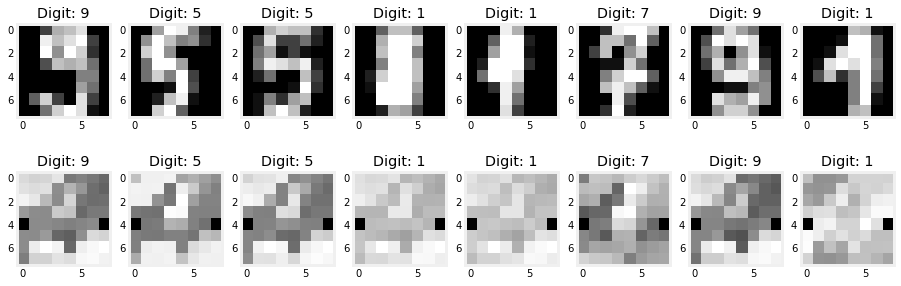

In [628]:
import random 

fig, axs = plt.subplots(2, 8, figsize=(14, 5))

for i in range(8):
    
    rand = random.choice(range(y_train.shape[0]))

    img_orig = x_train[rand]
    img_comp = x_train_ipca[rand]
    
    display_img(img_orig, y_train[rand], axs[0][i], vmin=None, vmax=None)
    display_img(img_comp, y_train[rand], axs[1][i], vmin=None, vmax=None)


fig.show()

In [629]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()

pca = PCA()

x_train_scaled = scaler.fit_transform(x_train)
pca.fit(x_train_scaled)

df_explained_variance_ratio = pd.DataFrame(
    [
        (component, explained_variance_ratio) 
        for component, explained_variance_ratio in enumerate(pca.explained_variance_ratio_, 1)
    ],
    columns=['component', 'explained_variance_ratio']
)

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


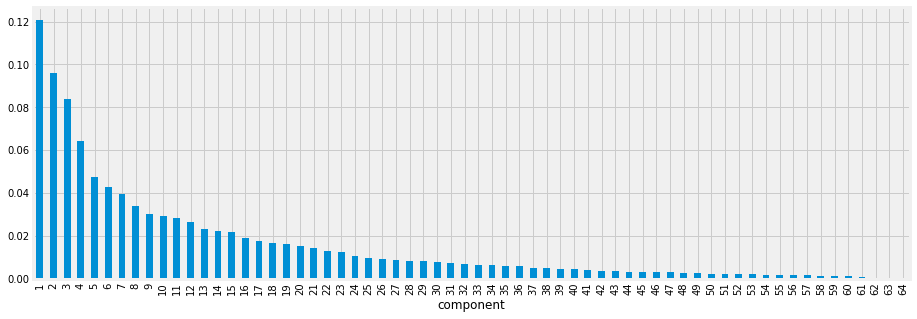

In [630]:
fig, ax = plt.subplots(1, 1, figsize=(14, 5))

df_explained_variance_ratio.set_index('component')['explained_variance_ratio'].plot(
    kind='bar',
    ax=ax
)

fig.show()

In [638]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
pca = PCA(n_components=15)

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

In [639]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 16))

x_train_ipca = pca.inverse_transform(x_train_pca) 
x_test_ipca = pca.inverse_transform(x_test_pca) 

x_train_ipca = scaler.fit_transform(x_train_ipca)
x_test_ipca = scaler.fit_transform(x_test_ipca)

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


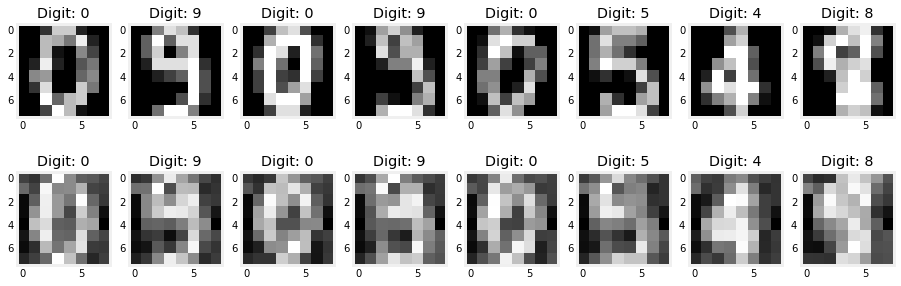

In [640]:
import random 

fig, axs = plt.subplots(2, 8, figsize=(14, 5))

for i in range(8):
    
    rand = random.choice(range(y_train.shape[0]))

    img_orig = x_train[rand]
    img_comp = x_train_ipca[rand]
    
    display_img(img_orig, y_train[rand], axs[0][i], vmin=None, vmax=None)
    display_img(img_comp, y_train[rand], axs[1][i], vmin=None, vmax=None)


fig.show()

In [641]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(x_train_ipca, y_train)

y_train_pred = clf.predict(x_train_ipca)
y_test_pred = clf.predict(x_test_ipca)

In [642]:
from sklearn.metrics import accuracy_score

print(
    'Digits test accuracy score: {:.1%} [train score: {:.1%}]'.format(
        accuracy_score(y_test, y_test_pred),
        accuracy_score(y_train, y_train_pred)
    )
    
)

Digits test accuracy score: 96.7% [train score: 98.2%]


# NeighborhoodComponentsAnalysis

In [54]:
from sklearn.neighbors import NeighborhoodComponentsAnalysis

nca = NeighborhoodComponentsAnalysis(n_components=2)

x_train_nca = nca.fit_transform(x_train, y_train)
x_test_nca = nca.transform(x_test)

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


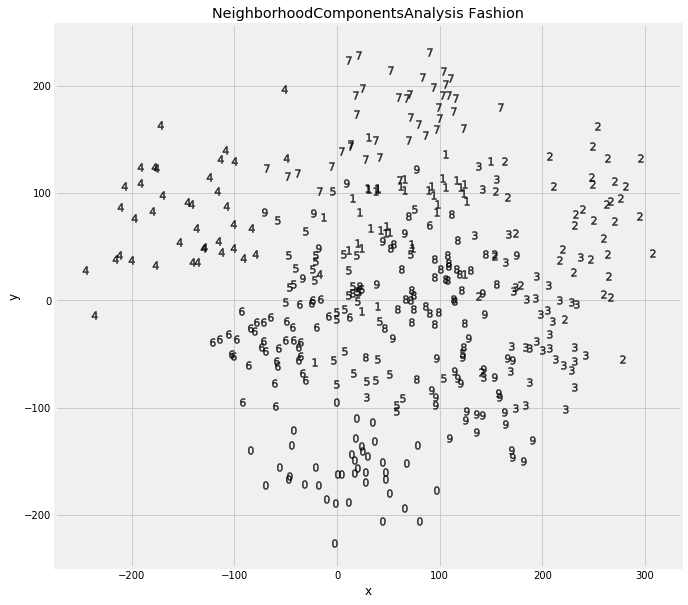

In [55]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

for target in set(y_train):
    pd.DataFrame(
        x_train_nca[
            y_train == target
        ],
        columns=['x', 'y']
    ).sample(n=40).plot(
        kind='scatter',
        x='x',
        y='y',
        marker=f'${target}$',
        s=64,
        color='k',
        alpha='0.75',
        ax=ax,
    )
    
ax.set_title('NeighborhoodComponentsAnalysis Fashion')

fig.show()

In [152]:
from sklearn.neighbors import NeighborhoodComponentsAnalysis

nca = NeighborhoodComponentsAnalysis(n_components=2)

x_train_nca = nca.fit_transform(x_train, y_train)
x_test_nca = nca.transform(x_test)

In [154]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3, weights='uniform')
clf.fit(x_train_nca, y_train)

y_train_pred = clf.predict(x_train_nca)
y_test_pred = clf.predict(x_test_nca)

from sklearn.metrics import accuracy_score

print(
    'Digits test accuracy score: {:.1%} [train score: {:.1%}]'.format(
        accuracy_score(y_test, y_test_pred),
        accuracy_score(y_train, y_train_pred)
    )
    
)

Digits test accuracy score: 73.6% [train score: 90.8%]


In [66]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5, weights='distance')
clf.fit(x_train_nca, y_train)

y_train_pred = clf.predict(x_train_nca)
y_test_pred = clf.predict(x_test_nca)

from sklearn.metrics import accuracy_score

print(
    'Digits test accuracy score: {:.1%} [train score: {:.1%}]'.format(
        accuracy_score(y_test, y_test_pred),
        accuracy_score(y_train, y_train_pred)
    )
    
)

Digits test accuracy score: 72.2% [train score: 100.0%]


/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


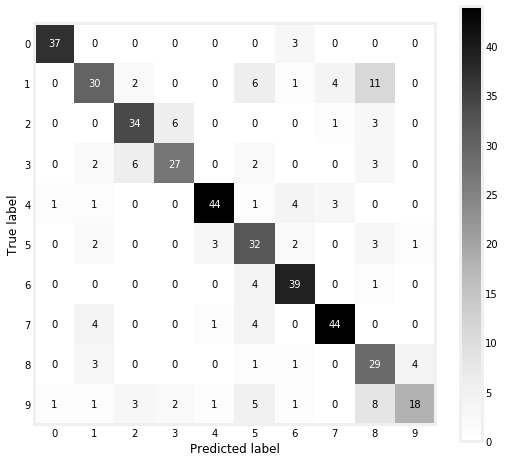

In [62]:
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(1, 1, figsize=(8, 8))

plot_confusion_matrix(clf, x_test_nca, y_test, cmap='Greys', ax=ax)
ax.grid(False)

fig.show()

In [36]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

scaler = MinMaxScaler()
clf = LogisticRegression(max_iter=1000)

x_train_scaled = scaler.fit_transform(x_train_nca)
x_test_scaled = scaler.transform(x_test_nca)

clf.fit(x_train_scaled, y_train)

y_train_pred = clf.predict(x_train_scaled)
y_test_pred = clf.predict(x_test_scaled)



from sklearn.metrics import accuracy_score

print(
    'Digits test accuracy score: {:.1%} [train score: {:.1%}]'.format(
        accuracy_score(y_test, y_test_pred),
        accuracy_score(y_train, y_train_pred)
    )
    
)

Digits test accuracy score: 90.0% [train score: 92.7%]


## Distances 

In [110]:
points = pd.DataFrame(
    [[1, 2], [4, 6]], columns=['x1', 'x2']
)

points

,x1,x2
0,1,2
1,4,6


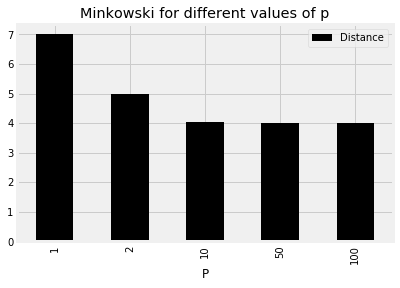

In [111]:
from sklearn.neighbors import DistanceMetric

d = [
    (p, DistanceMetric.get_metric('minkowski', p=p).pairwise(points)[0][-1])
    for p in [1, 2, 10, 50, 100]
]

pd.DataFrame(d, columns=['P', 'Distance']).set_index('P').plot(
    title='Minkowski for different values of p', kind='bar', color='k'
)

In [182]:
from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances

manhattan_distances(points)[0][-1], euclidean_distances(points)[0][-1]

(7.0, 5.0)

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


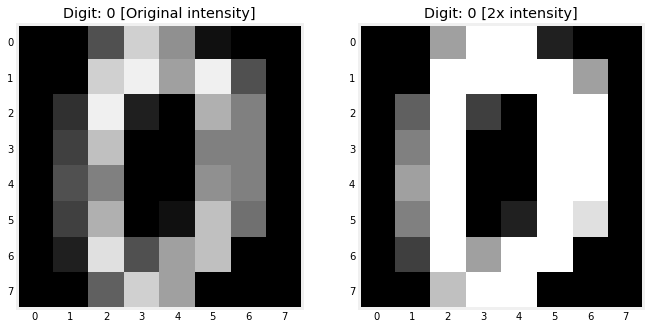

In [200]:
fig, axs = plt.subplots(1, 2, figsize=(10, 10))

display_img(1.0 * digits['data'][0],  f"{digits['target'][0]} [Original intensity]", axs[0])
display_img(2.0 * digits['data'][0],  f"{digits['target'][0]} [2x intensity]", axs[1])

fig.show()

In [155]:
from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances, cosine_distances

d0 = manhattan_distances(
    [1.0 * digits['data'][0], 2.0 * digits['data'][0]]
)[0,1]


d1 = euclidean_distances(
    [1.0 * digits['data'][0], 2.0 * digits['data'][0]]
)[0,1]

d2 = cosine_distances(
    [1.0 * digits['data'][0], 2.0 * digits['data'][0]]
)[0,1]

print(
    f'Manhattan Distances = {d0:.2f}, Euclidean Distances = {d1:.2f}, Cosine Distances {d2:.2f}'
)

Manhattan Distances = 294.00, Euclidean Distances = 55.41, Cosine Distances 0.00


In [163]:
from sklearn.metrics.pairwise import paired_distances

d0 = paired_distances([1.0 * digits['data'][0]], [2.0 * digits['data'][0]], metric='manhattan')[0]
d1 = paired_distances([1.0 * digits['data'][0]], [2.0 * digits['data'][0]], metric='euclidean')[0]
d2 = paired_distances([1.0 * digits['data'][0]], [2.0 * digits['data'][0]], metric='cosine')[0]

print(
    f'Manhattan Distances = {d0:.2f}, Euclidean Distances = {d1:.2f}, Cosine Distances {d2:.2f}'
)

Manhattan Distances = 294.00, Euclidean Distances = 55.41, Cosine Distances 0.00


## Pixel Selection

In [86]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif

mi = mutual_info_classif(x_train, y_train)

Text(0.5, 1.0, 'Pixels kept when 75% removed')

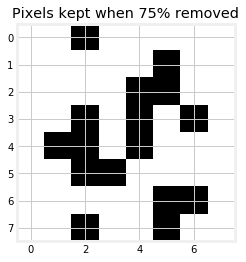

In [106]:
percent_to_remove = 75

mi_threshold = np.quantile(mi, 0.01 * percent_to_remove)

informative_pixels = (mi >= mi_threshold).reshape((8, 8))

plt.imshow(informative_pixels, cmap='Greys')
plt.title(f'Pixels kept when {percent_to_remove}% removed')

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


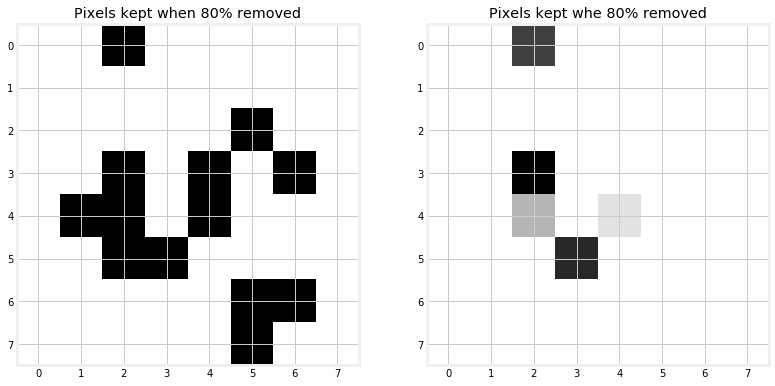

In [102]:
fig, axs = plt.subplots(1, 2, figsize=(12, 8))

mi_threshold = np.quantile(mi, 0.01 * percent_to_remove)

zeros = np.zeros(8*8)

informative_pixels = (mi >= mi_threshold).reshape((8, 8))

axs[0].imshow(informative_pixels, cmap='Greys')
axs[0].set_title(f'Pixels kept when {percent_to_remove}% removed')

informative_image = np.copy(x_train[1]) 
informative_image[mi < mi_threshold] = 0
informative_image = informative_image.reshape((8, 8))

axs[1].imshow(informative_image, cmap='Greys')
axs[1].set_title(f'Pixels kept whe {percent_to_remove}% removed')
    
fig.show()    

In [107]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectPercentile

percent_to_keep = 100 - percent_to_remove
selector = SelectPercentile(mutual_info_classif, percentile=percent_to_keep)

x_train_mi = selector.fit_transform(x_train, y_train)
x_test_mi = selector.transform(x_test)

In [108]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5, metric='cosine', n_jobs=-1)

clf.fit(x_train_mi, y_train)

y_train_pred = clf.predict(x_train_mi)
y_test_pred = clf.predict(x_test_mi)


print(
    'Shift vs Pullover test accuracy score: {:.1%} [train accuracy score: {:.1%}]'.format(
        accuracy_score(y_test, y_test_pred),
        accuracy_score(y_train, y_train_pred),
    )
    
)

Shift vs Pullover test accuracy score: 94.0% [train accuracy score: 96.0%]


# Fashion MNIST

In [1]:
from sklearn.datasets import fetch_openml
fashion_mnist = fetch_openml(data_id=40996)

In [2]:
fashion_mnist['data'].shape

(70000, 784)

In [3]:
fashion_mnist['DESCR']

"**Author**: Han Xiao, Kashif Rasul, Roland Vollgraf  \n**Source**: [Zalando Research](https://github.com/zalandoresearch/fashion-mnist)  \n**Please cite**: Han Xiao and Kashif Rasul and Roland Vollgraf, Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms, arXiv, cs.LG/1708.07747  \n\nFashion-MNIST is a dataset of Zalando's article images, consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Fashion-MNIST is intended to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits. \n\nRaw data available at: https://github.com/zalandoresearch/fashion-mnist\n\n### Target classes\nEach training and test example is assigned to one of the following labels:\nLabel  Description  \n0  T-shirt/top  \n1  Trouser  \n2  Pullover  \

In [4]:
help(''.rsplit)

Help on built-in function rsplit:

rsplit(...) method of builtins.str instance
    S.rsplit(sep=None, maxsplit=-1) -> list of strings
    
    Return a list of the words in S, using sep as the
    delimiter string, starting at the end of the string and
    working to the front.  If maxsplit is given, at most maxsplit
    splits are done. If sep is not specified, any whitespace string
    is a separator.



In [5]:
c = '0  T-shirt/top  \n1  Trouser  \n2  Pullover  \n3  Dress  \n4  Coat  \n5  Sandal  \n6  Shirt  \n7  Sneaker  \n8  Bag  \n9  Ankle boot'

fashion_label_translation = {
    int(k): v for k, v in [
        item.split(maxsplit=1) for item in c.split('\n')
    ]
}

fashion_label_translation


{0: 'T-shirt/top  ',
 1: 'Trouser  ',
 2: 'Pullover  ',
 3: 'Dress  ',
 4: 'Coat  ',
 5: 'Sandal  ',
 6: 'Shirt  ',
 7: 'Sneaker  ',
 8: 'Bag  ',
 9: 'Ankle boot'}

In [6]:
def translate_y(y):
    return pd.Series(y).apply(
        lambda y: fashion_label_translation[int(y)]
    ).values

In [7]:
np.sqrt(fashion_mnist['data'].shape[1])

28.0

In [8]:
from matplotlib.colors import ListedColormap

def display_fashion(img, target, ax):
    
    if len(img.shape):
        img = img.reshape((28, 28))
    
    ax.imshow(img, cmap='Greys')
    ax.set_title(f'{target}')
    ax.grid(False)

In [9]:
from sklearn.model_selection import train_test_split

fashion_mnist_sample = {}

fashion_mnist_sample['data'], _, fashion_mnist_sample['target'], _ = train_test_split(
    fashion_mnist['data'], fashion_mnist['target'], train_size=2000
)

x, y = fashion_mnist_sample['data'], fashion_mnist_sample['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [10]:
y_train_translated = translate_y(y_train)
y_test_translated = translate_y(y_test)

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


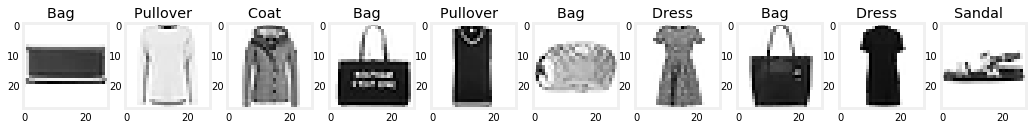

In [11]:
fig, axs = plt.subplots(1, 10, figsize=(16, 12))

import random 

for i in range(10):
    rand = random.choice(range(x_train.shape[0]))
    display_fashion(x_train[rand], y_train_translated[rand], axs[i])

fig.show()

In [12]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1600, 784), (400, 784), (1600,), (400,))

In [13]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

scaler = MinMaxScaler()
clf = LogisticRegression(max_iter=10000)

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

clf.fit(x_train_scaled, y_train)

y_train_pred = clf.predict(x_train_scaled)
y_test_pred = clf.predict(x_test_scaled)


from sklearn.metrics import accuracy_score

print(
    'Digits test accuracy score: {:.1%} [train score: {:.1%}]'.format(
        accuracy_score(y_test, y_test_pred),
        accuracy_score(y_train, y_train_pred)
    )
    
)

Digits test accuracy score: 79.0% [train score: 98.7%]


In [14]:
import time

from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5, metric='euclidean', n_jobs=-1)

t = time.time()
clf.fit(x_train, y_train)
print(f'Time taken to fit {time.time() - t:.3f}s')

t = time.time()
y_test_pred = clf.predict(x_test)
print(f'Time taken to predict {time.time() - t:.3f}s')

Time taken to fit 0.048s
Time taken to predict 0.431s


In [15]:
from sklearn.metrics import accuracy_score

print(
    'Fashion MNIST test accuracy score: {:.1%}'.format(
        accuracy_score(y_test, y_test_pred)
    )
    
)

Fashion MNIST test accuracy score: 77.8%


In [16]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


for k in range(1, 6, 2):
    
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(x_train_scaled, y_train)

    y_train_pred = clf.predict(x_train_scaled)
    y_test_pred = clf.predict(x_test_scaled)

    print(
        'Digits test accuracy score: {:.1%} [train score: {:.1%}] @ k={}'.format(
            accuracy_score(y_test, y_test_pred),
            accuracy_score(y_train, y_train_pred),
            k
        )

    )

Digits test accuracy score: 75.2% [train score: 100.0%] @ k=1
Digits test accuracy score: 77.8% [train score: 87.2%] @ k=3
Digits test accuracy score: 77.8% [train score: 84.4%] @ k=5


/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


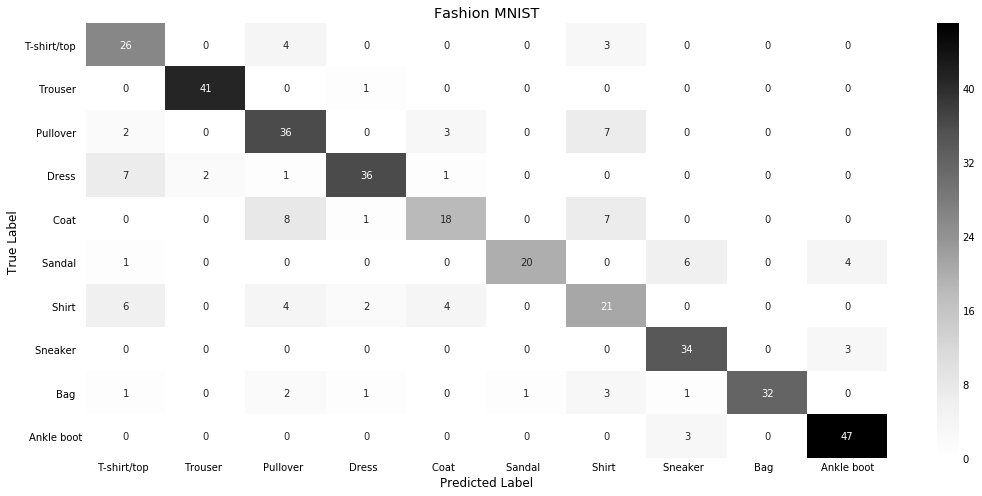

In [17]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

fig, ax = plt.subplots(1, 1, figsize=(16, 8))

labels_text = list(fashion_label_translation.values())

cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(
    cm, cmap='Greys', 
    annot=True, fmt="d",
    yticklabels=labels_text,
    xticklabels=labels_text,
    ax=ax
) 

ax.set_title('Fashion MNIST')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')

fig.show()

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


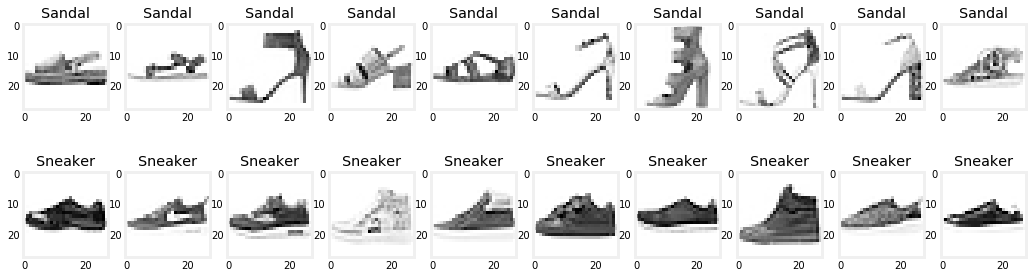

In [18]:
fig, axs = plt.subplots(2, 10, figsize=(16, 5))

sandals = pd.DataFrame(x_train[y_train=='5']).sample(10).values

for i, sandal in enumerate(sandals):
    display_fashion(sandal, 'Sandal', axs[0][i])

sneakers = pd.DataFrame(x_train[y_train=='7']).sample(10).values

for i, sneaker in enumerate(sneakers):
    display_fashion(sneaker, 'Sneaker', axs[1][i])

fig.show()

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


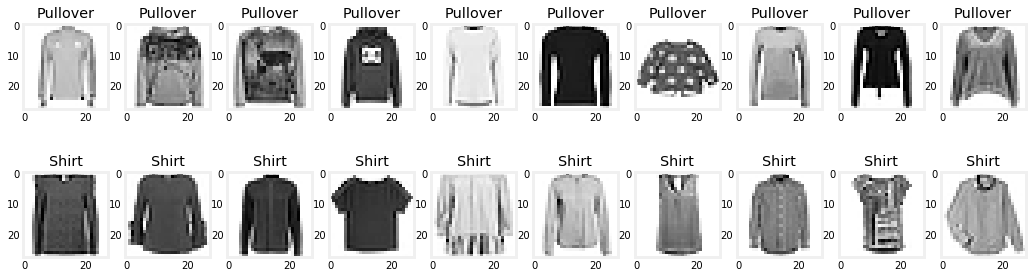

In [19]:
fig, axs = plt.subplots(2, 10, figsize=(16, 5))

pullovers = pd.DataFrame(x_train[y_train=='2']).sample(10).values

for i, pullover in enumerate(pullovers):
    display_fashion(pullover, 'Pullover', axs[0][i])

shirts = pd.DataFrame(x_train[y_train=='6']).sample(10).values

for i, shirt in enumerate(shirts):
    display_fashion(shirt, 'Shirt', axs[1][i])

fig.show()

# Shirts vs Pullovers

In [20]:
from sklearn.model_selection import train_test_split

x = pd.DataFrame(fashion_mnist['data'])
y = pd.Series(fashion_mnist['target'])

x_train, x_test, y_train, y_test = train_test_split(
    x[y.isin(('2','6'))].values, 
    y[y.isin(('2','6'))].values, 
    test_size=0.2
)

In [21]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((11200, 784), (2800, 784), (11200,), (2800,))

In [22]:
y_train_translated = translate_y(y_train)
y_test_translated = translate_y(y_test)

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


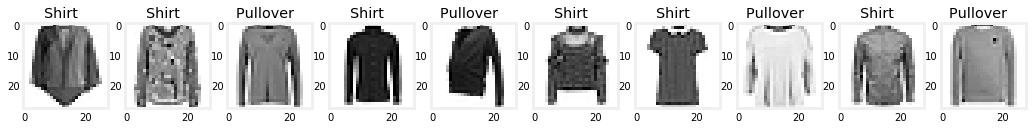

In [23]:
fig, axs = plt.subplots(1, 10, figsize=(16, 12))

import random 

for i in range(10):
    rand = random.choice(range(x_train.shape[0]))
    display_fashion(x_train[rand], y_train_translated[rand], axs[i])

fig.show()

In [ ]:
# Above cell is slow to execute, disabled and here are the reults
# 
# best_params: {'metric': 'cosine', 'n_neighbors': 5}
# best_score: 0.8732142857142858

In [28]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5, metric='cosine', n_jobs=-1)

clf.fit(x_train, y_train)

y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)


print(
    'Shift vs Pullover test accuracy score: {:.1%} [train accuracy score: {:.1%}]'.format(
        accuracy_score(y_test, y_test_pred),
        accuracy_score(y_train, y_train_pred),
    )
    
)

Shift vs Pullover test accuracy score: 88.4% [train accuracy score: 91.4%]


## PCA

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
pca = PCA(n_components=2, svd_solver='randomized')

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

x_train_2d = pca.fit_transform(x_train_scaled)
x_test_2d = pca.transform(x_test_scaled)

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


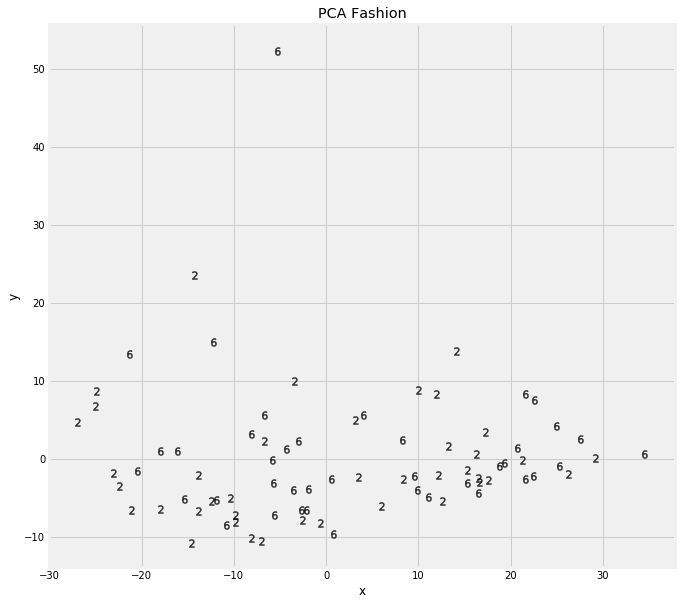

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

for target in set(y_train):
    pd.DataFrame(
        x_train_2d[
            y_train == target
        ],
        columns=['x', 'y']
    ).sample(n=40).plot(
        kind='scatter',
        x='x',
        y='y',
        marker=f'${target}$',
        s=64,
        color='k',
        alpha='0.75',
        ax=ax,
    )
    
ax.set_title('PCA Fashion')

fig.show()

In [40]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5, metric='cosine', n_jobs=-1)

clf.fit(x_train_2d, y_train)

y_train_pred = clf.predict(x_train_2d)
y_test_pred = clf.predict(x_test_2d)


print(
    'Shift vs Pullover test accuracy score: {:.1%} [train accuracy score: {:.1%}]'.format(
        accuracy_score(y_test, y_test_pred),
        accuracy_score(y_train, y_train_pred),
    )
    
)

Shift vs Pullover test accuracy score: 53.1% [train accuracy score: 69.7%]


In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()

pca = PCA()

x_train_scaled = scaler.fit_transform(x_train)
pca.fit(x_train_scaled)

df_explained_variance_ratio = pd.DataFrame(
    [
        (component, explained_variance_ratio) 
        for component, explained_variance_ratio in enumerate(pca.explained_variance_ratio_[:20], 1)
    ],
    columns=['component', 'explained_variance_ratio']
)

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


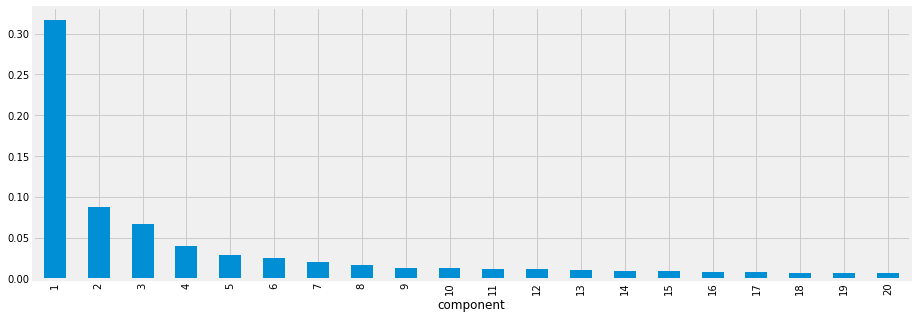

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(14, 5))

df_explained_variance_ratio.set_index('component')['explained_variance_ratio'].plot(
    kind='bar',
    ax=ax
)

fig.show()

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
pca = PCA(n_components=4, svd_solver='randomized', whiten=True)

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

In [44]:
from sklearn.preprocessing import MinMaxScaler

feature_range = x_train.min(), x_train.max()
scaler = MinMaxScaler(feature_range=feature_range)

x_train_ipca = pca.inverse_transform(x_train_pca) 
x_test_ipca = pca.inverse_transform(x_test_pca) 

x_train_ipca = scaler.fit_transform(x_train_ipca)
x_test_ipca = scaler.fit_transform(x_test_ipca)

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


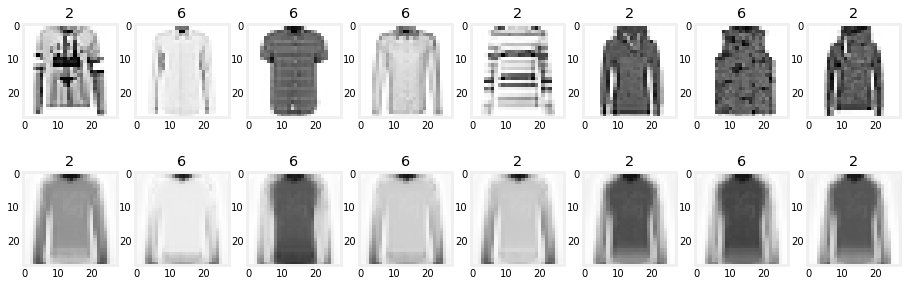

In [47]:
import random 

fig, axs = plt.subplots(2, 8, figsize=(14, 5))

for i in range(8):
    
    rand = random.choice(range(y_train.shape[0]))

    img_orig = x_train[rand]
    img_comp = x_train_ipca[rand]
    
    display_fashion(img_orig, y_train[rand], axs[0][i])
    display_fashion(img_comp, y_train[rand], axs[1][i])


fig.show()

In [ ]:
raise Exception('Next cell takes so long to run, continue?')

Calculating PCA ..
Calculating NCA ..
Calculating LLE ..


AttributeError: 'MDS' object has no attribute 'transform'

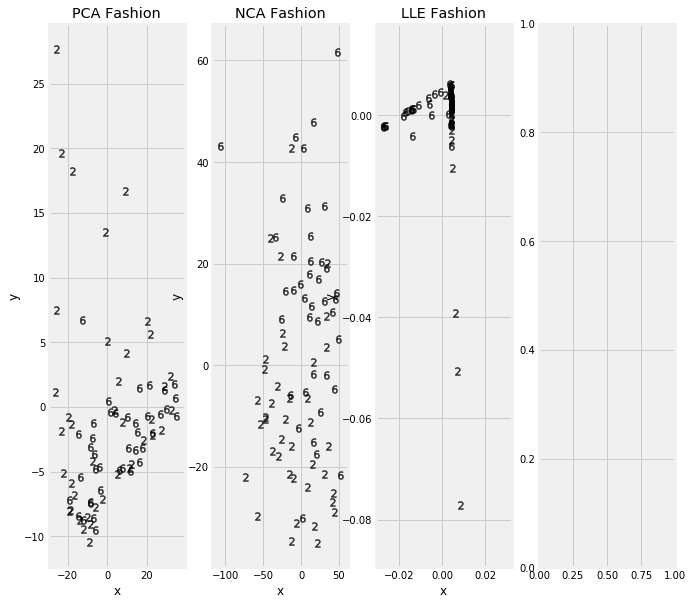

In [63]:
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import MDS

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)

methods = {
    'PCA': PCA(n_components=2),
    'NCA': NeighborhoodComponentsAnalysis(n_components=2),
    'LLE': LocallyLinearEmbedding(n_components=2),
}

fig, axs = plt.subplots(1, len(methods), figsize=(10, 10))

for i, (method_name, method_obj) in enumerate(methods.items()):
    
    method_obj.fit(x_train_scaled, y_train)
    x_train_2d = method_obj.transform(x_train_scaled)
    
    # print(x_train_2d, x_train_2d.shape)
    print(f'Calculating {method_name} ..')

    for target in set(y_train):
        pd.DataFrame(
            x_train_2d[
                y_train == target
            ],
            columns=['x', 'y']
        ).sample(n=40).plot(
            kind='scatter',
            x='x',
            y='y',
            marker=f'${target}$',
            s=64,
            color='k',
            alpha='0.75',
            ax=axs[i],
        )
        axs[i].set_title(f'{method_name} Fashion')

fig.show()

## Kernels 

In [ ]:
from scipy import ndimage

k_sharpen = [[0,-1,0], [-1,5,-1], [0,-1,0]]
k_box_blur = [[1/9,1/9,1/9],[1/9,1/9,1/9],[1/9,1/9,1/9]]
k_box_blur2 = [[1/16,1/16,1/16,1/16],[1/16,1/4,1/4,1/16], [1/16,1/4,1/4,1/16], [1/16,1/16,1/16,1/16]]
k_smooth = [[0.1,0.1,0.1],[0.1,0.2,0.1],[0.1,0.1,0.1]]
k_gaussian_blur = [[1,2,1], [2,4,2], [1,2,1]]
k_edge = [[1,1,1],[1,-8,1],[1,1,1]]
k_hline = [[-1,-1,-1],[2,2,2],[-1,-1,-1]]
k_vline = [[-1,2,-1],[-1,2,-1],[-1,2,-1]]
k_wtf = [[1,-1],[-1,0]]

k = k_hline

side = int(np.sqrt(x_train.shape[1]))

x_train_conv = ndimage.convolve(x_train.reshape((x_train.shape[0], side, side)), [k], mode='reflect', cval=0.0) 
x_test_conv = ndimage.convolve(x_test.reshape((x_test.shape[0], side, side)), [k], mode='reflect', cval=0.0)

x_train_conv = x_train_conv.reshape(x_train_conv.shape[0], x_train_conv.shape[1]*x_train_conv.shape[2]) 
x_test_conv = x_test_conv.reshape(x_test_conv.shape[0], x_test_conv.shape[1]*x_test_conv.shape[2]) 

In [ ]:
fig, axs = plt.subplots(2, 10, figsize=(16, 6))

import random 

for i in range(10):
    rand = random.choice(range(x_train.shape[0]))
    display_fashion(x_train[rand], y_train_translated[rand], axs[0][i])
    display_fashion(x_train_conv[rand], y_train_translated[rand], axs[1][i])

fig.show()

In [688]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

clf = KNeighborsClassifier(n_neighbors=5, metric='cosine')

clf.fit(x_train_scaled, y_train)
y_test_pred = clf.predict(x_test_scaled)

print(
    'Fashion MNIST test accuracy score: {:.1%} @ k={}'.format(
        accuracy_score(y_test, y_test_pred), k
    )

)

Fashion MNIST test accuracy score: 86.5% @ k=1
Fashion MNIST test accuracy score: 87.5% @ k=3
Fashion MNIST test accuracy score: 87.7% @ k=5
Fashion MNIST test accuracy score: 88.0% @ k=7
Fashion MNIST test accuracy score: 87.8% @ k=9
Fashion MNIST test accuracy score: 88.2% @ k=11


In [689]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train_conv)
x_test_scaled = scaler.transform(x_test_conv)

clf = KNeighborsClassifier(n_neighbors=5, metric='cosine')

clf.fit(x_train_scaled, y_train)
y_test_pred = clf.predict(x_test_scaled)

print(
    'Fashion MNIST test accuracy score: {:.1%} @ k={}'.format(
        accuracy_score(y_test, y_test_pred), k
    )

)

Fashion MNIST test accuracy score: 86.4% @ k=1
Fashion MNIST test accuracy score: 87.9% @ k=3
Fashion MNIST test accuracy score: 88.0% @ k=5
Fashion MNIST test accuracy score: 88.7% @ k=7
Fashion MNIST test accuracy score: 87.8% @ k=9
Fashion MNIST test accuracy score: 88.0% @ k=11


## Pixel Selection

In [776]:
f, pval = f_classif(x_train, y_train)

In [787]:
percent_to_remove = 75
percent_to_keep = 100 - percent_to_remove

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


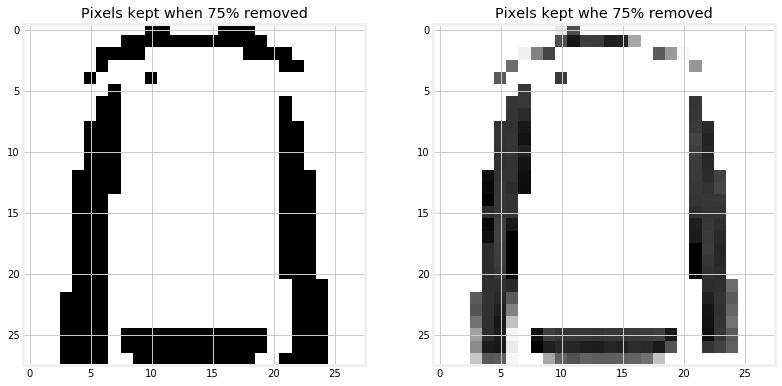

In [788]:
fig, axs = plt.subplots(1, 2, figsize=(12, 8))

f_threshold = np.quantile(f, 0.01 * percent_to_remove)

zeros = np.zeros(28*28)

informative_pixels = (f >= f_threshold).reshape((28, 28))

axs[0].imshow(informative_pixels, cmap='Greys')
axs[0].set_title(f'Pixels kept when {percent_to_remove}% removed')

informative_image = np.copy(x_train[1]) 
informative_image[f < f_threshold] = 0
informative_image = informative_image.reshape((28, 28))

axs[1].imshow(informative_image, cmap='Greys')
axs[1].set_title(f'Pixels kept whe {percent_to_remove}% removed')
    
fig.show()    

In [792]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectPercentile

selector = SelectPercentile(mutual_info_classif, percentile=percent_to_keep)

x_train_mi = selector.fit_transform(x_train, y_train)
x_test_mi = selector.transform(x_test)

In [793]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5, metric='cosine', n_jobs=-1)

clf.fit(x_train_mi, y_train)

y_train_pred = clf.predict(x_train_mi)
y_test_pred = clf.predict(x_test_mi)


print(
    'Shift vs Pullover test accuracy score: {:.1%} [train accuracy score: {:.1%}]'.format(
        accuracy_score(y_test, y_test_pred),
        accuracy_score(y_train, y_train_pred),
    )
    
)

Shift vs Pullover test accuracy score: 86.9% [train accuracy score: 90.1%]


In [332]:
from sklearn.neighbors import NeighborhoodComponentsAnalysis

nca = NeighborhoodComponentsAnalysis(n_components=2)

x_train_nca = nca.fit_transform(x_train, y_train)
x_test_nca = nca.transform(x_test)

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


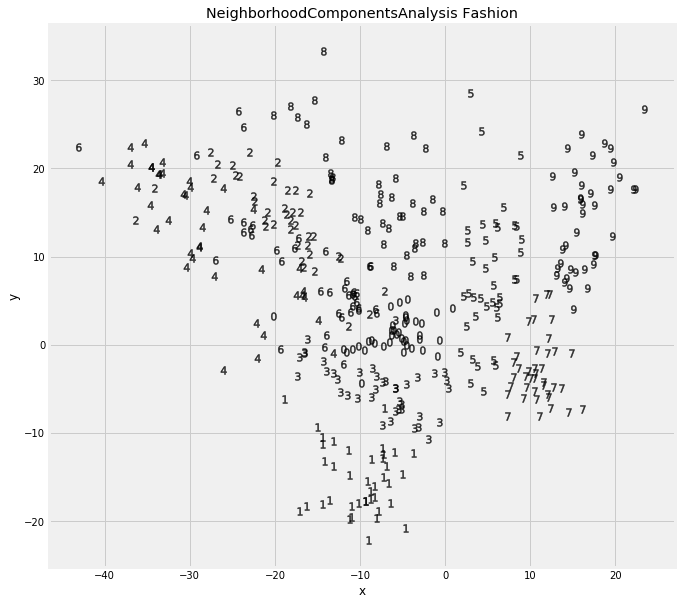

In [333]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

for target in set(y_train):
    pd.DataFrame(
        x_train_nca[
            y_train == target
        ],
        columns=['x', 'y']
    ).sample(n=40).plot(
        kind='scatter',
        x='x',
        y='y',
        marker=f'${target}$',
        s=64,
        color='k',
        alpha='0.75',
        ax=ax,
    )
    
ax.set_title('NeighborhoodComponentsAnalysis Fashion')

fig.show()

In [334]:
y_train_translated = translate_y(y_train)
y_test_translated = translate_y(y_test)

In [335]:
import time
from sklearn.neighbors import NearestCentroid

t = time.time()

clf = NearestCentroid(metric='euclidean')
clf.fit(x_train, y_train)

y_test_pred = clf.predict(x_test)

time_taken = time.time() - t

from sklearn.metrics import accuracy_score

print(
    'Fashion MNIST test accuracy score: {:.1%} [Original Centroid - time taken: {:.3f}s]'.format(
        accuracy_score(y_test, y_test_pred), time_taken
    )
    
)

Fashion MNIST test accuracy score: 66.8% [Original Centroid - time taken: 0.012s]


In [336]:
import time
from sklearn.neighbors import KNeighborsClassifier

t = time.time()

n_neighbors = 5
clf = KNeighborsClassifier(n_neighbors=n_neighbors, metric='euclidean')
clf.fit(x_train, y_train)

y_test_pred = clf.predict(x_test)

time_taken = time.time() - t

from sklearn.metrics import accuracy_score

print(
    'Fashion MNIST test accuracy score: {:.1%} [Original {}-NN - time taken: {:.3f}s]'.format(
        accuracy_score(y_test, y_test_pred), n_neighbors, time_taken
    )
    
)

Fashion MNIST test accuracy score: 79.0% [Original 5-NN - time taken: 1.019s]


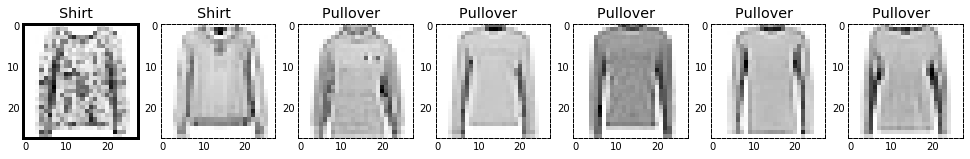

In [337]:
import random 

# Pick random mistake
rand_index = random.choice(
    np.arange(x_test_nca.shape[0])[
        y_test_pred != y_test
    ]
)

n_neighbors = 6

kneighbors_distance, kneighbors_index = clf.kneighbors(
    [x_test[rand_index,:]], 
    n_neighbors=n_neighbors, 
    return_distance=True
)

fig, axs = plt.subplots(1, n_neighbors+1, figsize=(15, 9))

display_fashion(
    x_test[rand_index], 
    y_test_translated[rand_index], 
    axs[0]
)

for i, neighbor_index in enumerate(kneighbors_index[0], 1):
    display_fashion(
        x_train[neighbor_index], 
        y_train_translated[neighbor_index], 
        axs[i]
    )
    
    
# Styling


for i in range(n_neighbors+1):
    for spline in axs[i].spines.values():
        linestyle = '-' if i == 0 else '--'
        linewidth = 3 if i == 0 else 1
        
        spline.set_linestyle(linestyle)
        spline.set_linewidth(linewidth)
        spline.set_color('k')


In [338]:
import time
from sklearn.neighbors import KNeighborsClassifier

t = time.time()

clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(x_train_nca, y_train)

y_test_pred = clf.predict(x_test_nca)

time_taken = time.time() - t

from sklearn.metrics import accuracy_score

print(
    'Fashion MNIST test accuracy score: {:.1%} [NCA - time taken: {:.3f}s]'.format(
        accuracy_score(y_test, y_test_pred), time_taken
    )
    
)

Fashion MNIST test accuracy score: 60.0% [NCA - time taken: 0.028s]


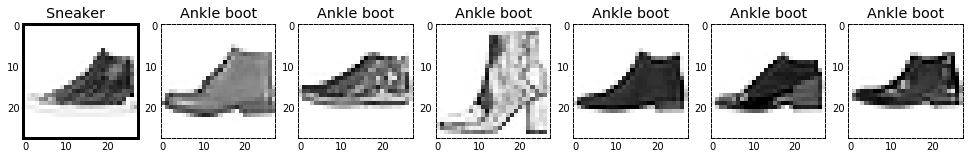

In [339]:
import random 

# Pick random mistake
rand_index = random.choice(
    np.arange(x_test_nca.shape[0])[
        y_test_pred != y_test
    ]
)

n_neighbors = 6

kneighbors_distance, kneighbors_index = clf.kneighbors(
    [x_test_nca[rand_index,:]], 
    n_neighbors=n_neighbors, 
    return_distance=True
)

fig, axs = plt.subplots(1, n_neighbors+1, figsize=(15, 9))

display_fashion(
    x_test[rand_index], 
    y_test_translated[rand_index], 
    axs[0]
)

for i, neighbor_index in enumerate(kneighbors_index[0], 1):
    display_fashion(
        x_train[neighbor_index], 
        y_train_translated[neighbor_index], 
        axs[i]
    )
    
    
# Styling


for i in range(n_neighbors+1):
    for spline in axs[i].spines.values():
        linestyle = '-' if i == 0 else '--'
        linewidth = 3 if i == 0 else 1
        
        spline.set_linestyle(linestyle)
        spline.set_linewidth(linewidth)
        spline.set_color('k')


/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


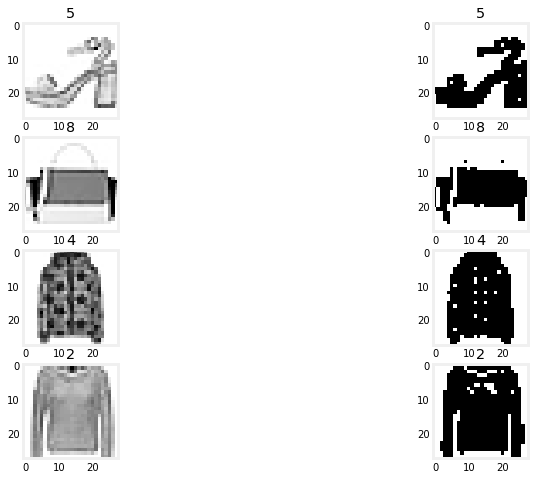

In [110]:
from skimage.filters import threshold_mean

fig, axs = plt.subplots(4, 2, figsize=(12, 8))

for i in range(4):
    
    rand = random.choice(range(fashion_mnist['data'].shape[0]))

    img = fashion_mnist['data'][rand]
    img_bin = img >= img.mean()

    display_fashion(img, fashion_mnist['target'][rand], axs[i][0])
    display_fashion(img_bin, fashion_mnist['target'][rand], axs[i][1])


fig.show()

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


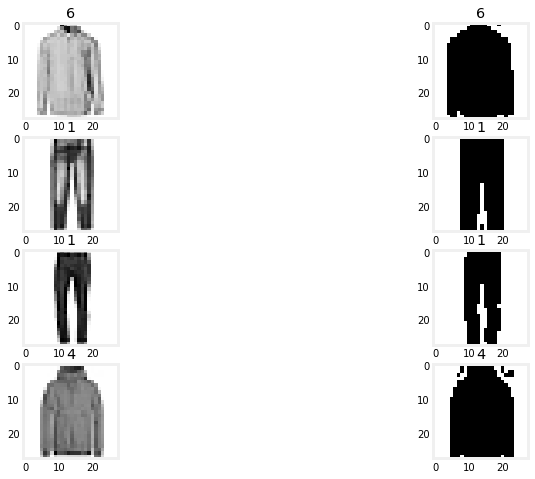

In [111]:
from skimage.filters import threshold_mean

fig, axs = plt.subplots(4, 2, figsize=(12, 8))

for i in range(4):
    
    rand = random.choice(range(fashion_mnist['data'].shape[0]))

    img = fashion_mnist['data'][rand]
    img_bin = img > 0

    display_fashion(img, fashion_mnist['target'][rand], axs[i][0])
    display_fashion(img_bin, fashion_mnist['target'][rand], axs[i][1])


fig.show()

In [230]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5, metric='euclidean', n_jobs=-1)

x_train_bin = x_train > 0
x_test_bin = x_test > 0

clf.fit(x_train_bin, y_train)

y_test_pred = clf.predict(x_test_bin)

In [231]:
from sklearn.metrics import accuracy_score

print(
    'Fashion MNIST test accuracy score: {:.1%} [Bin]'.format(
        accuracy_score(y_test, y_test_pred),
    )
    
)

Fashion MNIST test accuracy score: 84.9% [Bin]


/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


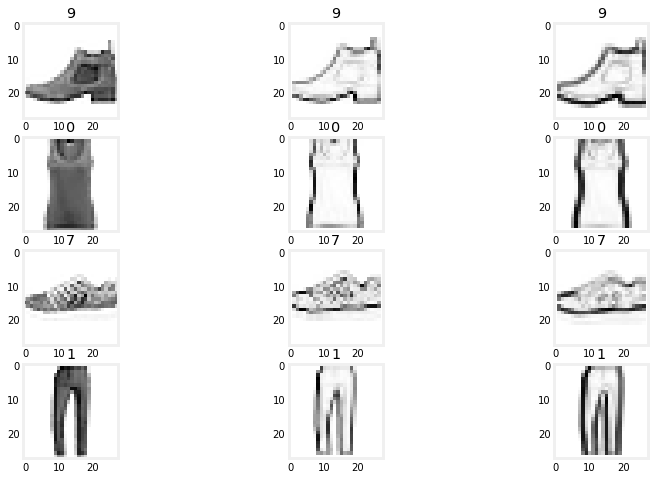

In [227]:
from skimage.filters import roberts, sobel

fig, axs = plt.subplots(4, 3, figsize=(12, 8))

for i in range(4):
    
    rand = random.choice(range(fashion_mnist['data'].shape[0]))

    img = fashion_mnist['data'][rand]
    img_roberts = roberts(img.reshape((28, 28)))
    img_sobel = sobel(img.reshape((28, 28)))

    display_fashion(img, fashion_mnist['target'][rand], axs[i][0])
    display_fashion(img_roberts, fashion_mnist['target'][rand], axs[i][1])
    display_fashion(img_sobel, fashion_mnist['target'][rand], axs[i][2])


fig.show()

In [117]:
df_fashin_analysis = pd.DataFrame(
    x_train.mean(axis=1),
)

df_fashin_analysis['target'] = y_train

df_fashin_analysis.groupby('target').mean()

,0
target,
0,4.975220
1,4.877841
2,4.894909
3,4.819762
4,4.851673
5,4.791193
6,4.862635
7,4.769058
8,5.128540


# Softmax

In [142]:
def softmax(a):
    return np.exp(a) / np.sum(np.exp(a))

def norm(a):
    return np.array(a) / np.sum(a)

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


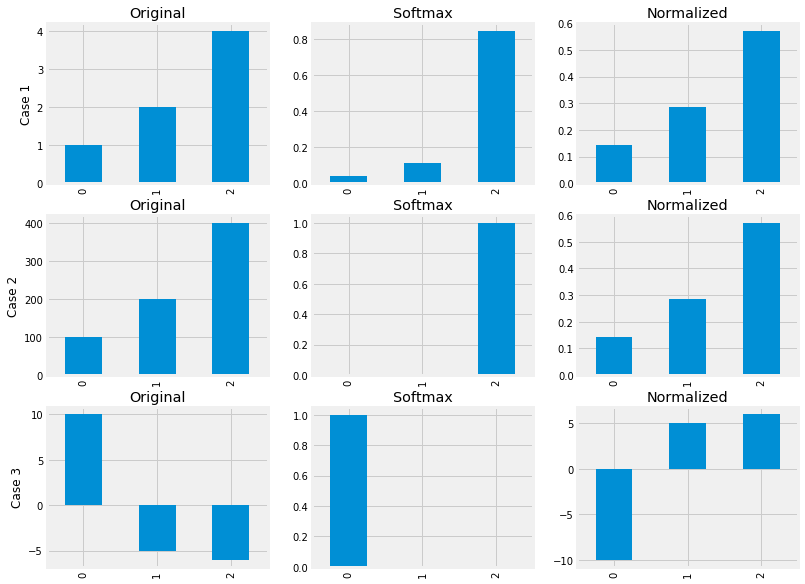

In [150]:
fig, axs = plt.subplots(3, 3, figsize=(12, 10), sharey=False)

# We have more samples in case 2 vs case 1; more confidence 
# The negative numbers in case 3 ruins the probability 

for i, a in enumerate([[1,2,4], [100, 200, 400], [10, -5, -6]]):
    pd.Series(a).plot(title='Original',  kind='bar', ax=axs[i][0])
    pd.Series(softmax(a)).plot(title='Softmax', kind='bar', ax=axs[i][1])
    pd.Series(norm(a)).plot(title='Normalized', kind='bar', ax=axs[i][2])
    
    axs[i][0].set_ylabel(f'Case {i+1}')

fig.show()

In [148]:
for a in [[1,2,4], [100, 200, 400], [-10, 5, 6]]:
    print(a, softmax(a))

[1, 2, 4] [0.04201007 0.1141952  0.84379473]
[100, 200, 400] [5.14820022e-131 1.38389653e-087 1.00000000e+000]
[-10, 5, 6] [8.22697981e-08 2.68941399e-01 7.31058518e-01]


In [1]:
help(print)

Help on built-in function print in module builtins:

print(...)
    print(value, ..., sep=' ', end='\n', file=sys.stdout, flush=False)
    
    Prints the values to a stream, or to sys.stdout by default.
    Optional keyword arguments:
    file:  a file-like object (stream); defaults to the current sys.stdout.
    sep:   string inserted between values, default a space.
    end:   string appended after the last value, default a newline.
    flush: whether to forcibly flush the stream.



In [1]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import accuracy_score